## Polarimetry (W3) - Sample Data Analysis

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

Importing the observed rotation data:

In [3]:
Data=pd.read_csv("W3Data.txt",sep="\t")
Data=Data.to_numpy()
Data

array([[14.35, 19.95, 26.5 , 33.5 , 39.95],
       [14.4 , 20.55, 25.95, 33.55, 39.85],
       [14.3 , 19.8 , 26.45, 33.4 , 40.15],
       [14.35, 20.05, 26.8 , 33.65, 40.1 ],
       [14.4 , 19.9 , 26.75, 33.5 , 40.15],
       [14.25, 20.5 , 26.5 , 33.65, 39.9 ],
       [14.5 , 19.85, 26.45, 33.75, 39.95],
       [14.45, 19.5 , 26.7 , 33.2 , 40.15],
       [14.3 , 19.45, 26.8 , 33.15, 40.1 ],
       [14.45, 19.2 , 26.85, 33.25, 39.95]])

Calculating the average observed rotation:

In [4]:
average_obsrot=np.zeros(Data[0,:].shape)
std_obsrot=np.zeros(Data[0,:].shape)
for i in range(5):
    average_obsrot[i]=np.mean(Data[:,i])
    std_obsrot[i]=np.std(Data[:,i])

Plotting the graph:

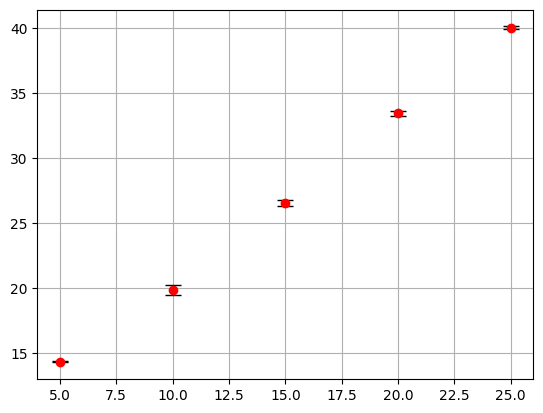

In [5]:
Concentration=np.arange(5,30,5)
fig,ax=plt.subplots()
ax.errorbar(Concentration,average_obsrot,std_obsrot,fmt='ro',linewidth=2, capsize=6,ecolor='black')
ax.grid()
plt.show()

Fitting the data:

In [6]:
def DataModel(x,m,c):
    return m*x+c

In [7]:
[popt,pcov]=curve_fit(DataModel,Concentration,average_obsrot)

In [8]:
popt

array([1.2977, 7.3965])

Determining the specific rotation using the slope:

$$C=\frac{100\alpha}{\ell\left[\alpha\right]}$$
$$C\ell\left[\alpha\right]=100\alpha$$
$$\frac{\ell\left[\alpha\right]}{100}C=\alpha$$

As the slope is $$m=\frac{\ell\left[\alpha\right]}{100}$$ Thus, the specific rotation is $$\left[\alpha\right]=\frac{100m}{\ell}$$

In [9]:
specrot=100*popt[0]/2
specrot

64.88500000714687

with an uncertainty of:

In [10]:
perr = np.sqrt(np.diag(pcov))
perr

array([0.02869512, 0.47585475])

The graph of the fitted data and the experimental data:

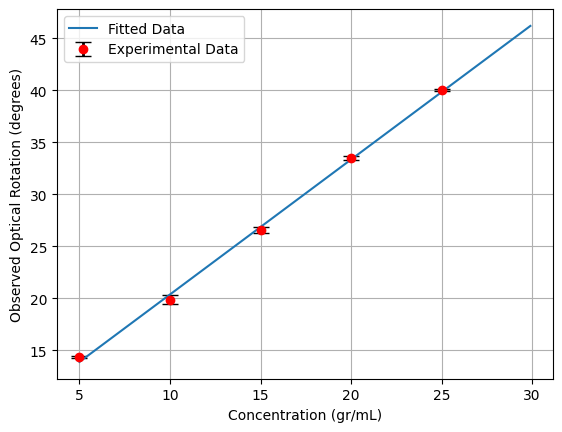

In [11]:
Concentrationgraph=np.arange(5,30,0.1)
fig,ax=plt.subplots()
ax.errorbar(Concentration,average_obsrot,std_obsrot,fmt='ro',linewidth=2, capsize=6,ecolor='black',label="Experimental Data")
ax.plot(Concentrationgraph,DataModel(Concentrationgraph,popt[0],popt[1]),linewidth=1.5,label="Fitted Data")
ax.set_xlabel("Concentration (gr/mL)")
ax.set_ylabel("Observed Optical Rotation (degrees)")
ax.legend()
ax.grid()
plt.show()